# PRACTICA-4a: Modelo de retención de clientes

La **retención de clientes** es el **porcentaje de clientes que dejaron de usar el producto o servicio de su empresa durante un período de tiempo determinado**. Una de las formas de calcular la tasa de abandono es dividir la cantidad de clientes perdidos durante un intervalo de tiempo determinado por la cantidad de clientes activos al comienzo del período. Por ejemplo, si obtuvo 1000 clientes y perdió 50 el mes pasado, entonces su tasa de abandono mensual es del 5 por ciento.

$$\text{Tasa abandono} = \frac{\# \text{clientes perdidos en un intervalo de tiempo} }{ \# \text{total de cleintes activos al conmienzo}}$$

Predecir la retención de clientes es un problema comercial extremadamente importante, especialmente en industrias donde el costo de adquisición de clientes (CAC) es alto, como tecnología, telecomunicaciones, finanzas, etc. La capacidad de predecir que un cliente en particular tiene un alto riesgo de retención, si bien todavía hay tiempo para hacer algo al respecto, representa una enorme fuente de ingresos potencial adicional para las empresas.

# Dataset

Antes de llegar a los datos, inicialicemos nuestro entorno:

In [2]:
import numpy as np
import pandas as pd

# Matplotlib forma la base para la visualización en Python
import matplotlib.pyplot as plt

# Usaremos la biblioteca Seaborn
import seaborn as sns

sns.set()

# Los gráficos en formato retina son más nítidos y legibles
%config InlineBackend.figure_format = 'retina'
# https://samchaaa.medium.com/jupyter-notebook-hacks-for-cleaner-simpler-notebooks-2e088b8407f3

Examinamos los datos sobre la rotación de clientes de un operador de telecomunicaciones.

In [3]:
df = pd.read_csv("telecom_churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


La última columna de datos, Churn, es nuestra variable objetivo. Es binario: True indica que la empresa finalmente perdió a este cliente y False indica que el cliente se mantuvo.

# Visualización univariante

El análisis univariado analiza una característica a la vez. Cuando analizamos una característica de forma independiente, generalmente nos interesa principalmente la distribución de sus valores e ignoramos otras características en el conjunto de datos.
A continuación, consideraremos diferentes tipos estadísticos de características y las herramientas correspondientes para su análisis visual individual.

# Características cuantitativas

Las características cuantitativas toman valores numéricos ordenados. Esos valores pueden ser discretos, como números enteros, o continuos, como números reales, y generalmente expresan un conteo o una medida.

Histogramas y gráficas de densidad: la forma más fácil de observar la distribución de una variable numérica es trazar su histograma

In [30]:
df[features]

,Total day minutes,Total intl calls
0,265.1,3
1,161.6,3
2,243.4,5
3,299.4,7
4,166.7,3
...,...,...
3328,156.2,6
3329,231.1,4
3330,180.8,6
3331,213.8,10


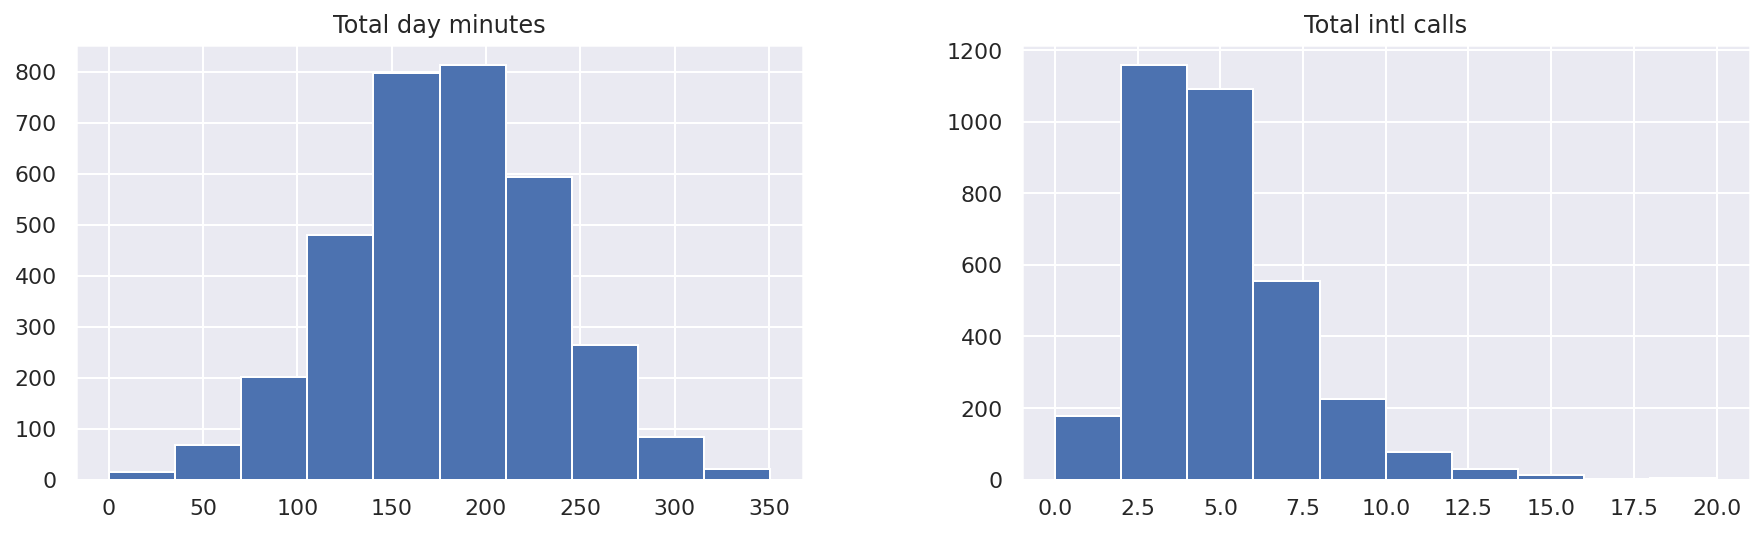

In [10]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(15, 4));

Un histograma agrupa valores en intervalos de igual rango de valores. La forma del histograma puede contener pistas sobre el tipo de distribución subyacente: gaussiana, exponencial, etc. También puede detectar cualquier asimetría en su forma cuando la distribución es casi regular pero tiene algunas anomalías.

En el gráfico anterior, vemos que la variable Minutos totales del día tiene una distribución normal, mientras que las llamadas internacionales totales tienen un sesgo prominente a la derecha (su cola es más larga a la derecha).

También hay otra forma, a menudo más clara, de comprender la distribución: diagramas de densidad o, más formalmente, diagramas de densidad del kernel. Pueden considerarse una versión suavizada del histograma. Su principal ventaja frente a estos últimos es que no dependen del tamaño de los contenedores. Vamos a crear diagramas de densidad para las mismas dos variables:

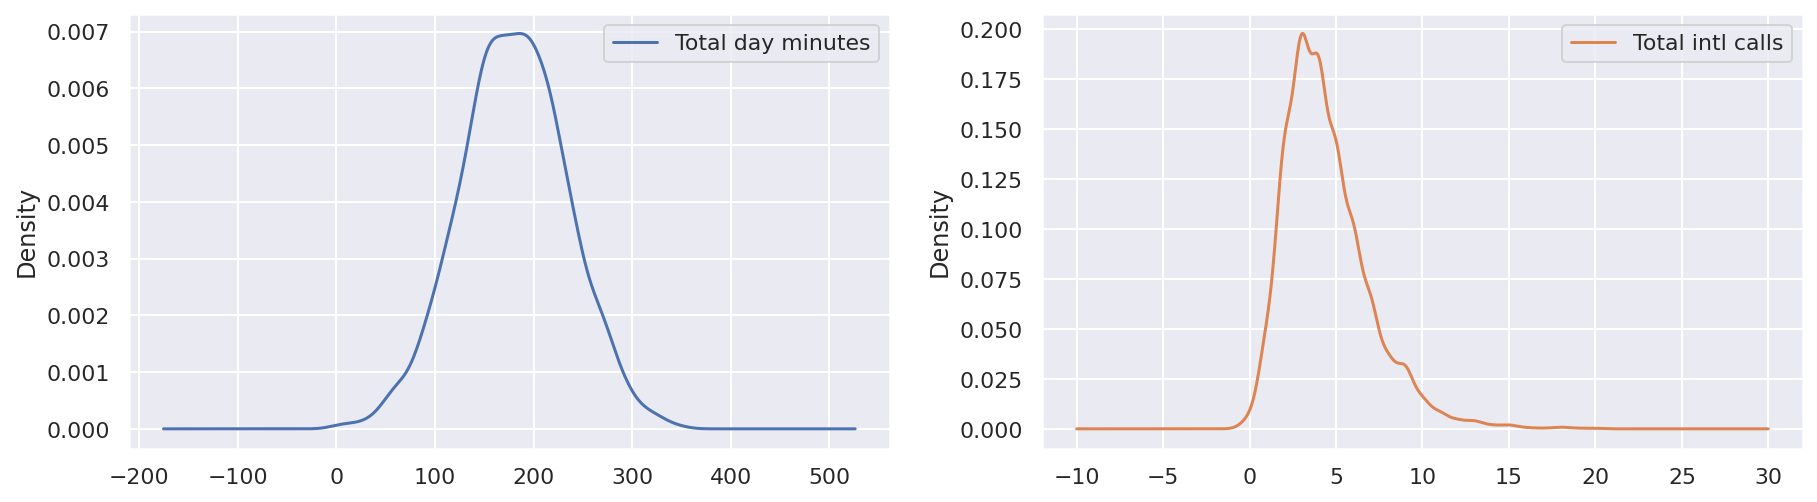

In [19]:
# layout indica una fila y dos columnas
# https://stackoverflow.com/questions/58440524/change-pandas-plotting-backend-to-get-interactive-plots-instead-of-matplotlib-st
df[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(15, 4));

También es posible trazar una distribución de observaciones. Por ejemplo, veamos la distribución de Minutos totales del día. De forma predeterminada, el gráfico muestra tanto el histograma como la estimación de la densidad del kernel (KDE) en la parte superior.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


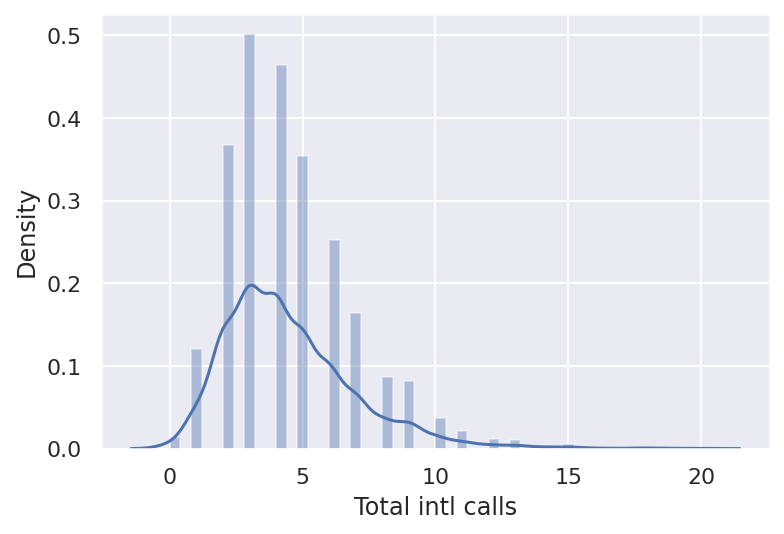

In [24]:
sns.distplot(df["Total intl calls"]);

La altura de las barras del histograma aquí está normada y muestra la densidad en lugar del número de ejemplos en cada contenedor.

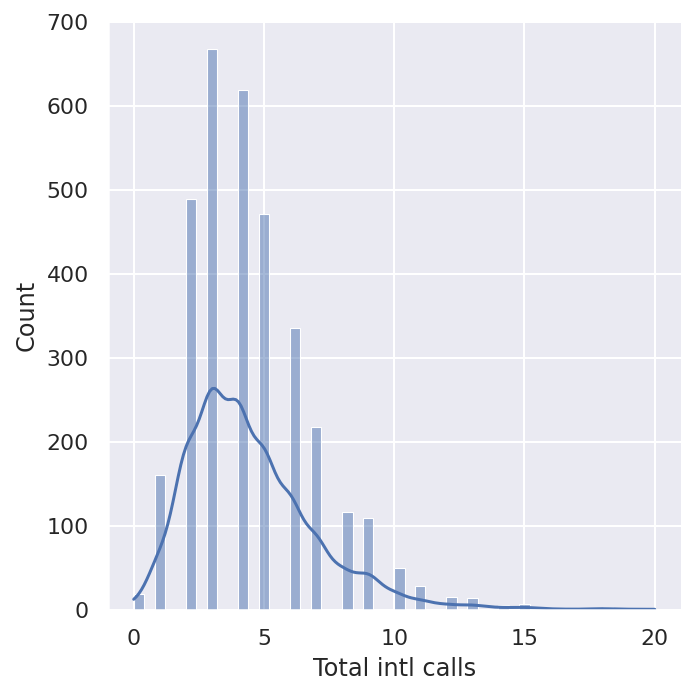

In [26]:
sns.displot(df["Total intl calls"], kde=True);

# Box plot

Otro tipo útil de visualización es un diagrama de caja.

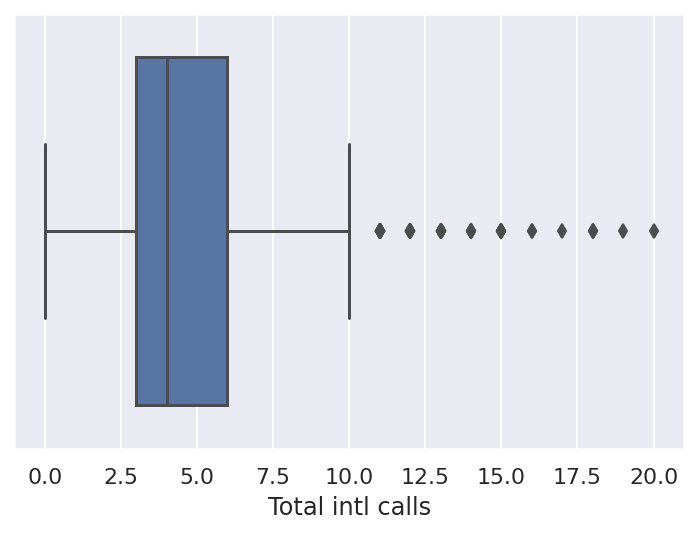

In [27]:
sns.boxplot(x="Total intl calls", data=df);

Veamos cómo interpretar un diagrama de caja. Sus componentes son una caja (obviamente, por eso se llama diagrama de caja), los llamados bigotes y una serie de puntos individuales (outliers).

El cuadro por sí solo ilustra la dispersión intercuartil de la distribución; su longitud está determinada por los percentiles 25 (Q1) y 75 (Q3). La línea vertical dentro de la caja marca la mediana (50%) de la distribución.

Los bigotes son las líneas que se extienden desde la caja. Representan toda la dispersión de puntos de datos, específicamente los puntos que se encuentran dentro del intervalo $Q1-1.5(IQR)$, $Q3+1.5(IQR)$, donde $IQR=Q3-Q1$ es el rango intercuartílico.

Los valores atípicos que quedan fuera del rango delimitado por los bigotes se trazan individualmente como puntos negros a lo largo del eje central. Podemos ver que una gran cantidad de llamadas internacionales es bastante rara en nuestros datos.

# Bar plot

El gráfico de barras es una representación gráfica de la tabla de frecuencias. Tracemos las distribuciones para dos variables categóricas:

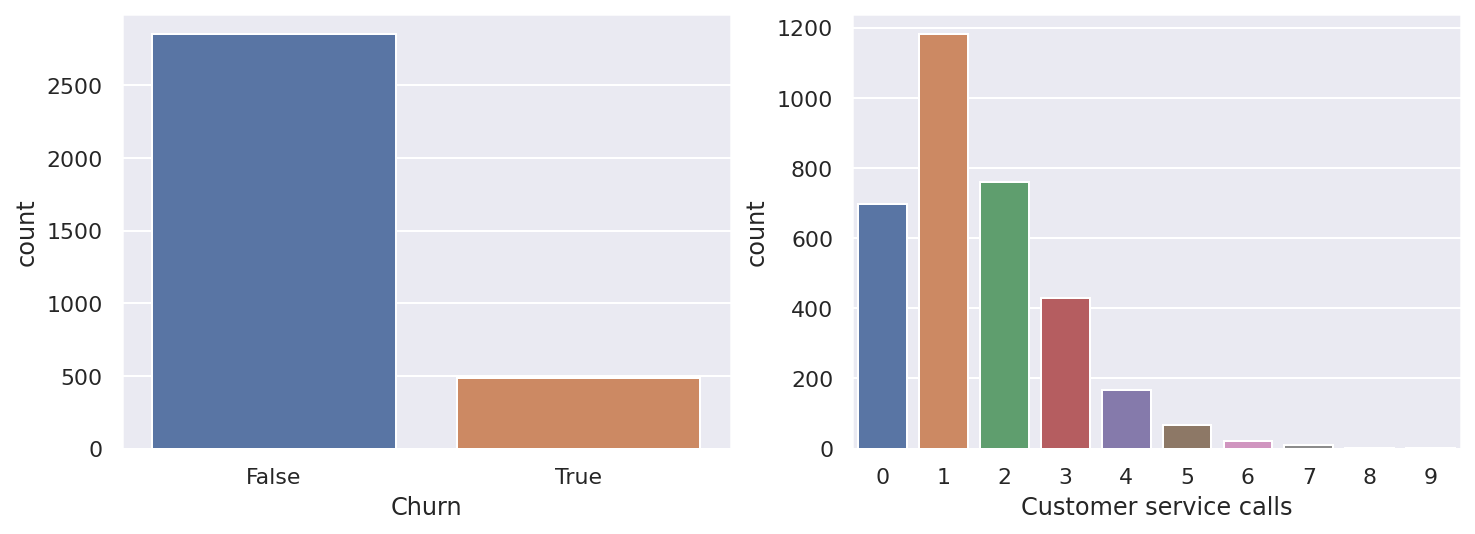

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

# Scatter plot

El diagrama de dispersión muestra los valores de dos variables numéricas como coordenadas cartesianas en el espacio 2D. También son posibles los diagramas de dispersión en 3D.

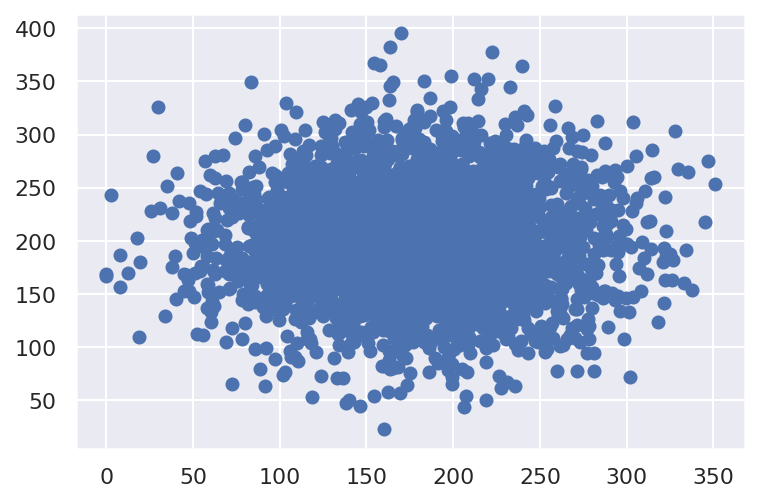

In [ ]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

Obtenemos una imagen de dos variables normalmente distribuidas. Además, parece que estas características no están correlacionadas porque la forma de elipse está alineada con los ejes.

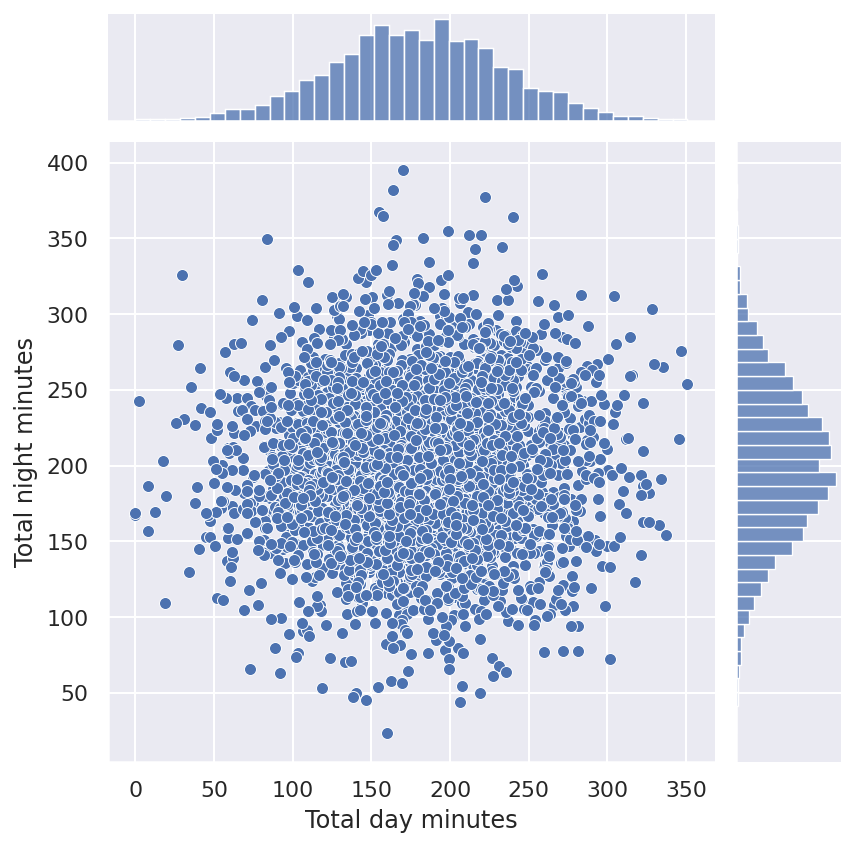

In [ ]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

Usando la misma función, también podemos obtener una versión suavizada de nuestra distribución bivariada:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


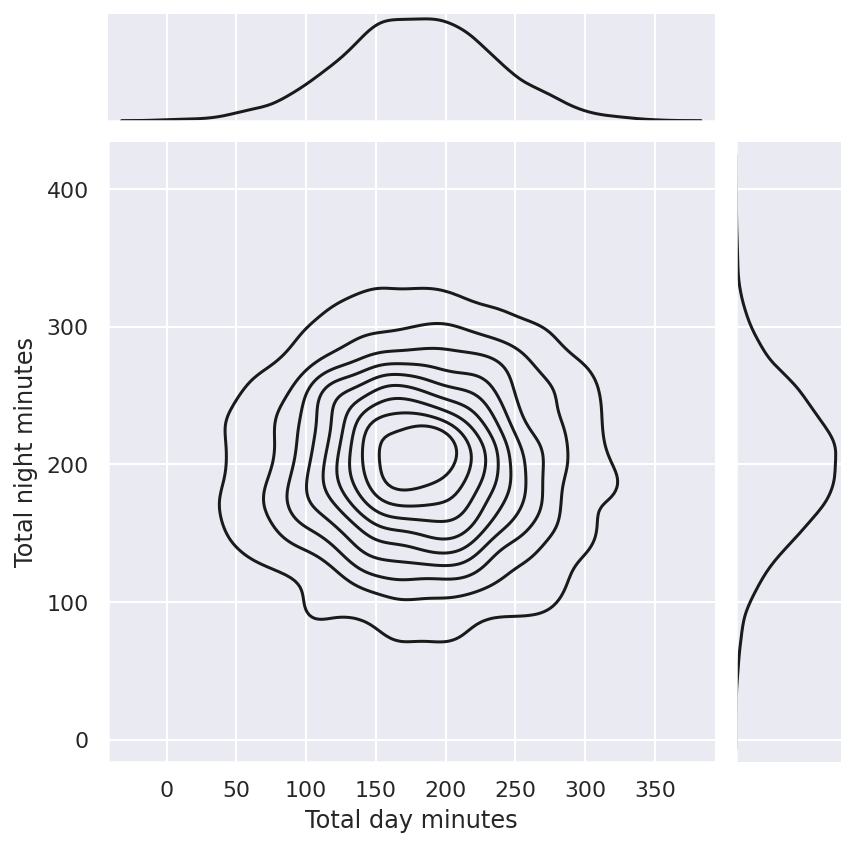

In [ ]:
sns.jointplot("Total day minutes", "Total night minutes", data=df, kind="kde", color="k");

# Cuantitativo vs. categórico

En esta sección, intentaremos obtener nuevos conocimientos para la predicción de abandono a partir de las interacciones entre las características numéricas y categóricas.

Más específicamente, veamos cómo se relacionan las variables de entrada con la variable de destino Churn. Anteriormente, mencionamos sobre diagramas de dispersión. Además, sus puntos pueden codificarse por color o tamaño para que los valores de una tercera variable categórica también se presenten en la misma figura.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


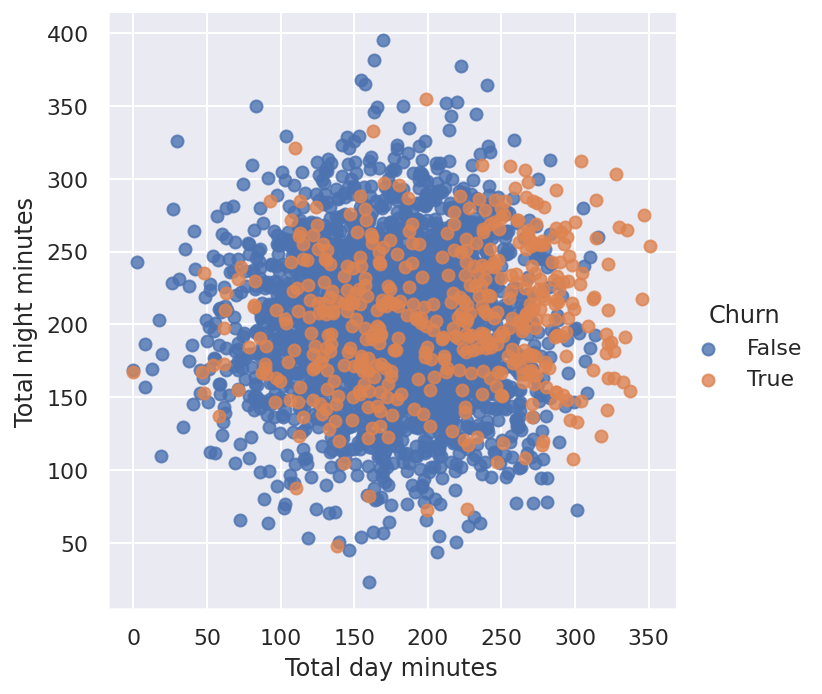

In [29]:
sns.lmplot("Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False);

Parece que nuestra pequeña proporción de clientes desleales se inclina hacia la esquina superior derecha; es decir, dichos clientes tienden a pasar más tiempo al teléfono tanto de día como de noche.

# EJERCICIO: Categórico vs. Categórico

Como vimos anteriormente, la variable Llamadas de atención al cliente tiene pocos valores únicos y, por lo tanto, puede considerarse numérica u ordinaria. Ahora, estamos interesados en la relación entre esta característica ordinaria y la variable objetivo Churn. Muestre la distribución del número de llamadas al servicio de atención al cliente, de nuevo usando un gráfico de conteo. Describa brevemente su resultado

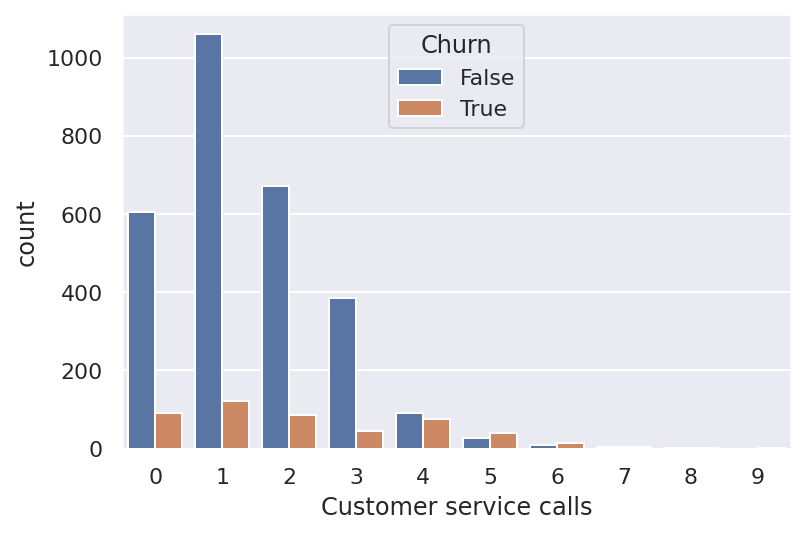

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Vemos primeramente que nuestra distribucion disminuye conforme el numero de llamadas por servicio. De igual forma notamos que la mayoria de los clientes hacen una llamada al servicio y que la cantidad de clientes perdidos es cuando se tiene 1 a 4 llamadas, y vemos que ya son pocos los que realizan seis llamadas.

# EJERCICIO

Ahora, grafique la relación entre Churn y las funciones binarias, el plan internacional y el plan de correo de voz. Describa brevemente su resultado. 

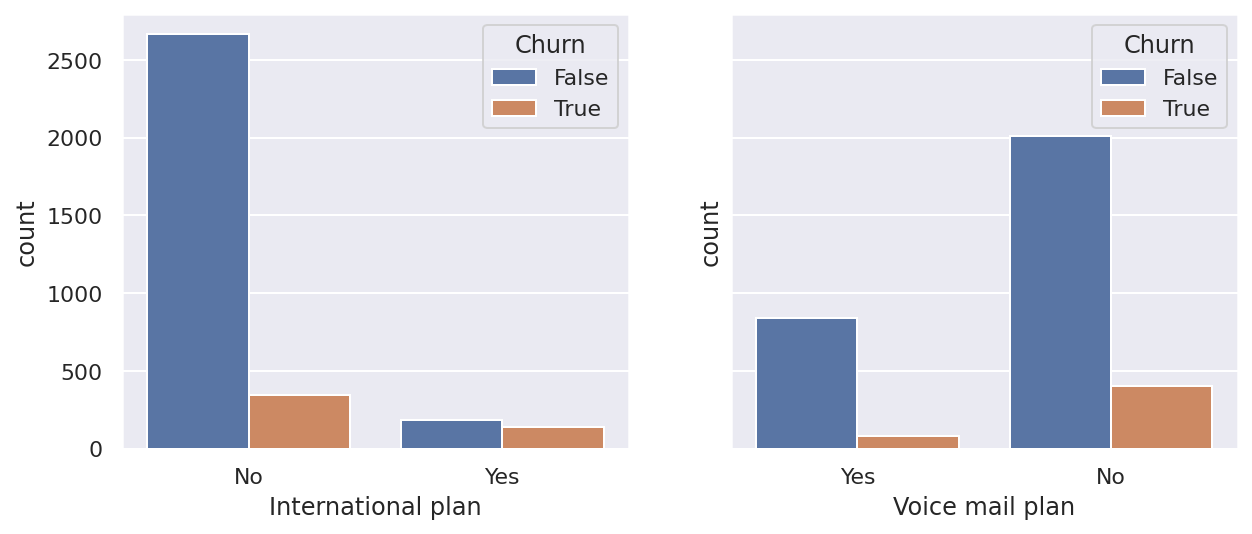

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

Vemos que en la gráfica izquierda el plan internacional no es muy pedido por los usuarios, mientras que el plan de servicios de correo esta un poco más equilibrado entre los usuarios que lo tienen o no. Por otra parte el número de clientes perdidos cuando se tiene un plan de correo de voz es muy baja, mientras los no lo tienen suelene dejar el servicio por otras circunstancias.